In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
flower = pd.read_csv(r'/content/Iris.csv')

In [ ]:
flower


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
flower.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  149 non-null    float64
 2   SepalWidthCm   147 non-null    float64
 3   PetalLengthCm  149 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
flower.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,149.000000,147.000000,149.000000,150.000000
mean,75.500000,5.838255,3.054422,3.774497,1.198667
std,43.445368,0.828512,0.428957,1.759651,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.400000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
flower.head(25)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,NaN,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
flower.tail(25)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
125,126,7.2,3.2,6.0,1.8,Iris-virginica
126,127,6.2,2.8,4.8,1.8,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
128,129,6.4,2.8,5.6,2.1,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica
133,134,6.3,2.8,5.1,1.5,Iris-virginica
134,135,6.1,2.6,5.6,1.4,Iris-virginica


In [ ]:
flower.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

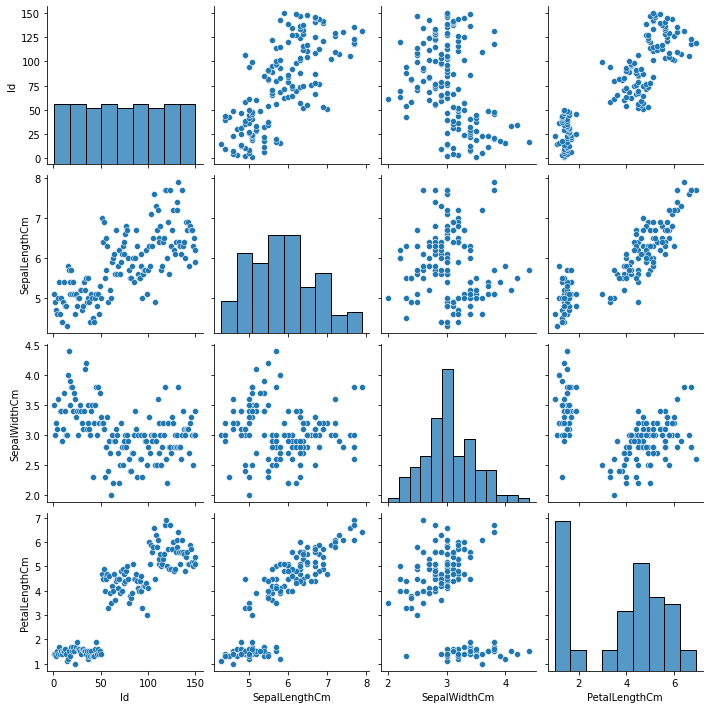

In [ ]:
sns.pairplot(flower[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']])
plt.show()

In [ ]:
flower.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
import sklearn.cluster as cluster
k_model=cluster.KMeans(n_clusters=5, init="k-means++")
k_model=k_model.fit(flower[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [ ]:
k_model.cluster_centers_

array([[ 45.        ,   5.35517241,   3.22068966,   2.37241379,
          0.59310345],
       [105.5       ,   6.25333333,   2.85666667,   5.11333333,
          1.77333333],
       [135.5       ,   6.60666667,   3.01      ,   5.48333333,
          2.01333333],
       [ 15.5       ,   5.02666667,   3.45      ,   1.47333333,
          0.24666667],
       [ 75.        ,   5.95483871,   2.7483871 ,   4.28709677,
          1.34193548]])

In [ ]:
k_model.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
flower['clusters']= k_model.labels_

In [ ]:
flower['clusters'].values

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
flower['clusters'].value_counts()

4    31
3    30
2    30
1    30
0    29
Name: clusters, dtype: int64

In [ ]:
flower.to_csv('G:\ACY 21-22\DS Lab\Kcluster.csv')

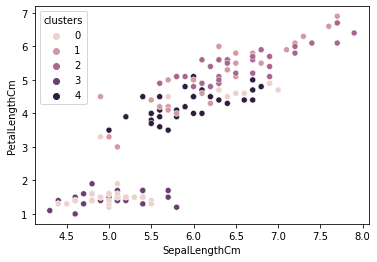

In [ ]:
sns.scatterplot(x="SepalLengthCm", y="PetalLengthCm", hue="clusters", data=flower)

In [ ]:
new_data=flower[['SepalLengthCm','PetalLengthCm']]
K=range(1,12)
wss=[]
for i in K:
   k_model=cluster.KMeans(n_clusters=i, init="k-means++")
   k_model=k_model.fit(new_data)
   wss_iter=k_model.inertia_
   wss.append(wss_iter)

In [ ]:
center_points=pd.DataFrame({'clusters' : K, 'WSS':wss})
center_points

,clusters,WSS
0,1,566.032067
1,2,112.962627
2,3,53.801351
3,4,34.314421
4,5,25.631465
5,6,21.827273
6,7,18.416887
7,8,15.170569
8,9,13.291910
9,10,11.901877


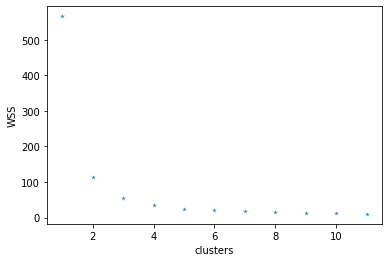

In [ ]:
sns.scatterplot(x='clusters', y='WSS', data=center_points, marker="*")